# Figure 5: High deleterious mutation rate accelerates extinction in doomed populations

In [6]:
from doomed import *

### Generate heat map data

You can skip directly to the "Load data" section below.

In [ ]:
Z0 = List([1000])
nsteps = 21
s_range = np.logspace(-2., 0, nsteps)
u_range = np.logspace(-2.7, -.7, nsteps)

In [ ]:
print(u_range)

In [ ]:
print(s_range)

In [ ]:
def heat(Z0, s_range, u_range):
    Mresult = []
    Vresult = []
    M0result = []
    for s in s_range:
        print(round(s, 4), end=' ')
        for u in u_range:
            m, v = extinction_time(Z0, 15, s, u, 1e-8)
            m0, v0 = click_time(Z0[0], 0, s, u, 1e-8)
            Mresult.append((m, u, s))
            Vresult.append((v, u, s))
            M0result.append((m0, u, s))
    return Mresult, Vresult, M0result

def get_matrix(data, n):
    starter = np.zeros((n, n))
    j = 0
    for row in starter:
        z = 0
        for element in row:
            row[z] = data[j][0]
            j += 1
            z += 1
    return starter

In [ ]:
Mheat, Vheat, M0heat = heat(Z0, s_range, u_range)
Marray = get_matrix(Mheat, nsteps)
Varray = get_matrix(Vheat, nsteps)
M0array = get_matrix(M0heat, nsteps)

### Save data

In [ ]:
with open('../data/heatA.npy', 'wb') as f1:
    np.save(f1, Marray)
with open('../data/heatB.npy', 'wb') as f2:
    np.save(f2, Varray)
with open('../data/heatC.npy', 'wb') as f3:
    np.save(f3, M0array)

### Load data

In [7]:
Marray = np.load('../data/heatA.npy')
Varray = np.load('../data/heatB.npy')
M0array = np.load('../data/heatC.npy')

In [8]:
# coordinates to draw red box from figure 1 on heat maps.
u1 = 2.5 #-2.5
u2 = 19  #-.85
s1 = 4.5 #-1.6
s2 = 12  #-.85

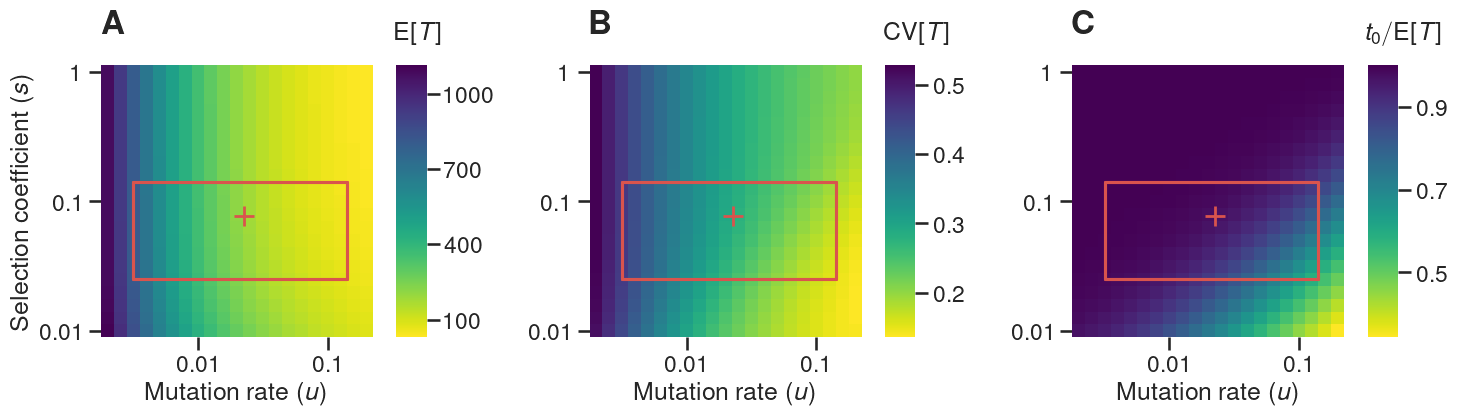

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14.5, 4))
fig.subplots_adjust()

red = sns.xkcd_rgb["pale red"]

ax1.set_position([-.04, .172, .4, .68])
ax2.set_position([.297, .172, .4, .68])
ax3.set_position([ .63, .172, .4, .68])
cbar_ax1 = fig.add_axes([-.04 + 0.31, .172, .021, .68])
cbar_ax2 = fig.add_axes([.297 + 0.31, .172, .021, .68])
cbar_ax3 = fig.add_axes([ .63 + 0.31, .172, .021, .68])

sns.heatmap(Marray, square = True, ax=ax1, cbar_ax = cbar_ax1, cmap='viridis_r', 
    cbar=True, cbar_kws={'ticks': [100, 400, 700, 1000]})
ax1.text(0, 23.5, r"\textbf{A}", size=24, weight='bold')
ax1.text(22.7, 23, r"E$[T]$", ha='left')
ax1.set_ylabel(r'Selection coefficient $(s)$')

sns.heatmap(np.sqrt(Varray) / Marray, square = True, ax=ax2, cbar_ax = cbar_ax2, cbar=True, 
    cmap='viridis_r', cbar_kws={'ticks': [.2, .3, .4, .5]})
ax2.text(0, 23.5, r"\textbf{B}", size=24, weight='bold')
ax2.text(22.7, 23, r"CV$[T]$", ha='left')
ax2.set_ylabel('')

sns.heatmap(M0array / Marray, square = True, ax=ax3, cbar_ax = cbar_ax3, cbar=True, 
    cmap='viridis_r', cbar_kws={'ticks': [.5, .7, .9]})
ax3.text(0, 23.5, r"\textbf{C}", size=24, weight='bold')
ax3.text(22.7, 23, r"$t_0/\mathrm{E}[T]$", ha='left')
ax3.set_ylabel('')

for ax in [ax1, ax2, ax3]:
    ax.invert_yaxis()
    ax.set_xlabel(r'Mutation rate $(u)$')
    ax.set_xticks([7.5, 17.5])
    ax.set_xticklabels([0.01, 0.1], rotation = 0)
    ax.set_yticks([0.5, 10.5, 20.5])
    ax.set_yticklabels([0.01, 0.1, 1], rotation = 0)
    ax.plot(11.05, 9.4, '+', ms=15, color=red, markeredgewidth=2)
    ax.plot([u1] * 2, [s1, s2], '-', color=red)
    ax.plot([u2] * 2, [s1, s2], '-', color=red)
    ax.plot([u1, u2], [s1] * 2, '-', color=red)
    ax.plot([u1, u2], [s2] * 2, '-', color=red)

plt.savefig('../figures/heat.pdf')